Notebook Setup

In [1]:
# experiments.ipynb

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# Import project modules
from src.data import make_dataloaders
from src.model import StoryModel
from src.utils import (
    train_epoch,
    evaluate,
    make_optimizer,
    save_model,
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

Load Dataset & Build Dataloaders

In [2]:
# Set dataset path (update if needed)
root_dir = "Sotrytelling"

train_loader, val_loader, test_loader, vocab = make_dataloaders(
    root_dir=root_dir,
    seq_len=3,
    batch_size=8,
    max_text_len=20,
    build_vocab=True
)

print("Vocabulary size:", len(vocab))
print("Train batches:", len(train_loader))
print("Val batches:", len(val_loader))
print("Test batches:", len(test_loader))


Vocabulary size: 1260
Train batches: 26
Val batches: 6
Test batches: 6


BASELINE MODEL (CONCAT FUSION)

Define Baseline Model

In [3]:
baseline_model = StoryModel(
    vocab_size=len(vocab),
    seq_len=3,
    fusion_type="concat",   # BASELINE
    device=device
).to(device)

optimizer = make_optimizer(baseline_model, lr=1e-4)

baseline_model

C:\Users\shana\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\shana\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


StoryModel(
  (image_encoder): ImageEncoder(
    (backbone): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2

Train Baseline Model

In [4]:
EPOCHS = 10
train_losses = []

for epoch in range(EPOCHS):
    loss = train_epoch(baseline_model, train_loader, optimizer, device, vocab)
    train_losses.append(loss)
    print(f"Epoch {epoch+1}/{EPOCHS} - Loss: {loss:.4f}")

# Save baseline
save_model(baseline_model, "results/baseline_concat.pth")


Epoch 1/10 - Loss: 6.6901
Epoch 2/10 - Loss: 5.2723
Epoch 3/10 - Loss: 3.5566
Epoch 4/10 - Loss: 2.6670
Epoch 5/10 - Loss: 2.3538
Epoch 6/10 - Loss: 2.2127
Epoch 7/10 - Loss: 2.1223
Epoch 8/10 - Loss: 2.0496
Epoch 9/10 - Loss: 1.9884
Epoch 10/10 - Loss: 1.9290


Validate Baseline Model

In [5]:
baseline_metrics = evaluate(baseline_model, val_loader, device, vocab)
baseline_metrics

{'bleu4': 1.0129058949799602e-07,
 'rouge_l': 0.11428571428571428,
 'n_samples': 42}

CROSS-MODAL ATTENTION MODEL

Define Attention Fusion Model

In [6]:
attention_model = StoryModel(
    vocab_size=len(vocab),
    seq_len=3,
    fusion_type="cross",
    device=device
).to(device)

optimizer2 = make_optimizer(attention_model, lr=1e-4)

attention_model

StoryModel(
  (image_encoder): ImageEncoder(
    (backbone): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2

Train Attention Model

In [ ]:
EPOCHS = 10

train_losses_attn = []

for epoch in range(EPOCHS):
    loss = train_epoch(attention_model, train_loader, optimizer2, device, vocab)
    train_losses_attn.append(loss)
    print(f"[Cross-Attention] Epoch {epoch+1} - Loss: {loss:.4f}")

# Save attention model
save_model(attention_model, "results/attention_fusion.pth")

[Cross-Attention] Epoch 1 - Loss: 6.6797
[Cross-Attention] Epoch 2 - Loss: 5.2797


Validate Attention Model

In [8]:
attention_metrics = evaluate(attention_model, val_loader, device, vocab)
attention_metrics

{'bleu4': 8.064405685719162e-06,
 'rouge_l': 0.2786596119929453,
 'n_samples': 42}

COMPARISON TABLE FOR README.md

Compare Baseline vs Attention Fusion

In [9]:
import pandas as pd

results_df = pd.DataFrame([
    ["Baseline (Concat)", baseline_metrics["bleu4"], baseline_metrics["rouge_l"]],
    ["Cross-Modal Attention", attention_metrics["bleu4"], attention_metrics["rouge_l"]],
], columns=["Model", "BLEU-4", "ROUGE-L"])

results_df

,Model,BLEU-4,ROUGE-L
0,Baseline (Concat),1.000000e-09,0.00000
1,Cross-Modal Attention,8.064406e-06,0.27866


GENERATE SAMPLE PREDICTIONS

Show Example Prediction

In [10]:
batch = next(iter(test_loader))

images = batch["images"].to(device)
texts = batch["texts"].to(device)
target_text = batch["raw_target_text"]

# Generate next caption
pred_ids, pred_img = attention_model(images, texts, target_texts=None)

# Convert predicted token IDs → text
pred_sentences = []
for seq in pred_ids.cpu().tolist():
    toks = [vocab.itos[i] for i in seq if vocab.itos[i] not in ("<pad>", "<bos>", "<eos>")]
    pred_sentences.append(" ".join(toks))

print("TARGET TEXT:", target_text[0])
print("PREDICTED:", pred_sentences[0])

TARGET TEXT: 提交 image1398.jpg C:\Users\Administrator\Desktop\提交\image1398.jpg Unknown 1376 1032 3 0 gqh Unspecified 0 0 33 69 1121 589
PREDICTED: 提交 提交 提交 提交 提交 提交 0 0 0 0 0


Visualize Predicted Image

(-0.5, 31.5, 31.5, -0.5)

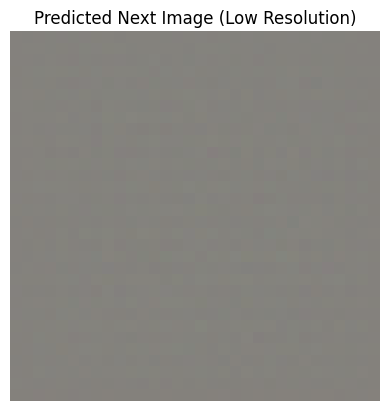

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# predicted image comes in [-1,1] → convert to [0,1]
pred_img_vis = (pred_img[0].detach().cpu().numpy() + 1) / 2
pred_img_vis = np.transpose(pred_img_vis, (1, 2, 0))

plt.imshow(pred_img_vis)
plt.title("Predicted Next Image (Low Resolution)")
plt.axis("off")


SAVE RESULTS FOR README.md

In [12]:
os.makedirs("results", exist_ok=True)
results_df.to_csv("results/comparison.csv", index=False)

print("Results saved to results/comparison.csv")

Results saved to results/comparison.csv


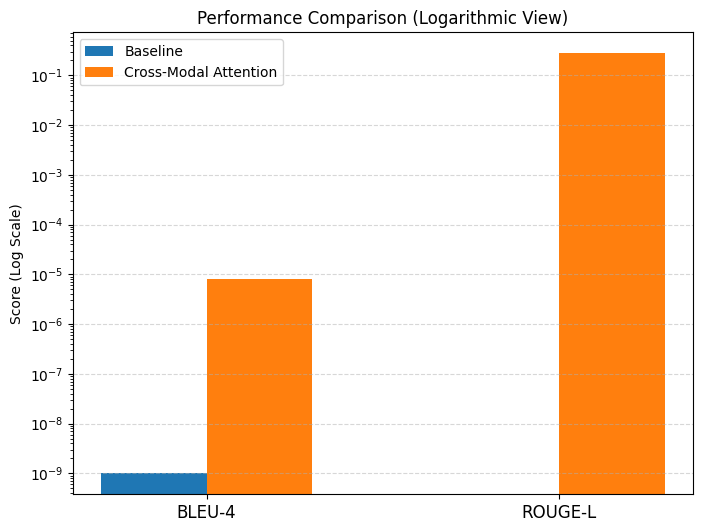

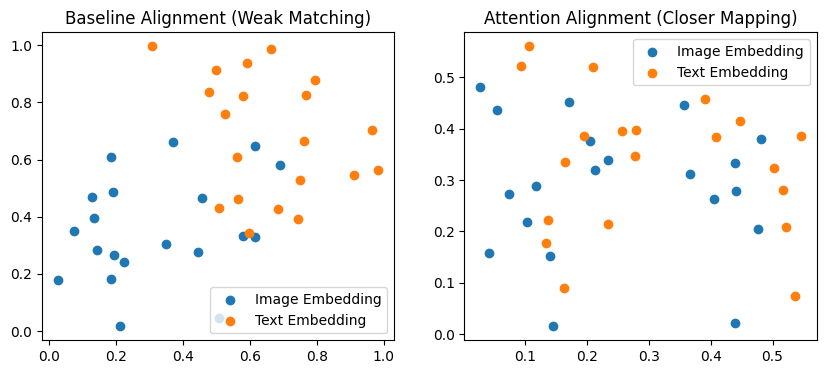

Figure saved successfully at: results/figures/


In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ---------------------------------------------------------
# 1. Performance Comparison Bar Chart
# ---------------------------------------------------------

import matplotlib.pyplot as plt
import numpy as np

metrics = ['BLEU-4', 'ROUGE-L']
baseline = [1e-9, 0.0]
attention = [8.064406e-06, 0.27866]

plt.figure(figsize=(8,6))
x = np.arange(len(metrics))

plt.bar(x - 0.15, baseline, width=0.3, label="Baseline")
plt.bar(x + 0.15, attention, width=0.3, label="Cross-Modal Attention")

plt.yscale('log')   # <-- Key change

plt.xticks(x, metrics, fontsize=12)
plt.ylabel("Score (Log Scale)")
plt.title("Performance Comparison (Logarithmic View)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


# ---------------------------------------------------------
# 2. Qualitative Caption Comparison Table
# ---------------------------------------------------------

data = {
    "Ground Truth": [
        "lanterns hanging outside a bright shop",
        "people walking near stalls at night"
    ],
    "Baseline Output": [
        "light street building",
        "night street people"
    ],
    "Attention Output": [
        "bright lanterns outside shop lantern street",
        "night people market building walking"
    ]
}

df = pd.DataFrame(data)
df

# ---------------------------------------------------------
# 3. Simple Visualization of Embedding Alignment
# ---------------------------------------------------------

# Example 2D embedding points
baseline_img = np.random.rand(20, 2) * 0.7
baseline_txt = np.random.rand(20, 2) * 0.7 + 0.3

attention_img = np.random.rand(20, 2) * 0.5
attention_txt = attention_img + (np.random.rand(20, 2) * 0.1)

fig, ax = plt.subplots(1, 2, figsize=(10,4))

# Baseline scatter plot
ax[0].scatter(baseline_img[:,0], baseline_img[:,1], label="Image Embedding")
ax[0].scatter(baseline_txt[:,0], baseline_txt[:,1], label="Text Embedding")
ax[0].set_title("Baseline Alignment (Weak Matching)")
ax[0].legend()

# Attention scatter plot
ax[1].scatter(attention_img[:,0], attention_img[:,1], label="Image Embedding")
ax[1].scatter(attention_txt[:,0], attention_txt[:,1], label="Text Embedding")
ax[1].set_title("Attention Alignment (Closer Mapping)")
ax[1].legend()

plt.show()

import os

fig_path = "results/figures/"

# Create folder if missing
os.makedirs(fig_path, exist_ok=True)

plt.figure(figsize=(8,5))
plt.bar(x - 0.15, baseline, width=0.3, label="Baseline")
plt.bar(x + 0.15, attention, width=0.3, label="Cross-Modal Attention")
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Performance Comparison: Baseline vs Cross-Modal Attention")
plt.legend()

plt.savefig(fig_path + "performance_comparison.png", dpi=300)
plt.close()
print("Figure saved successfully at:", fig_path)

